<a href="https://colab.research.google.com/github/vineelbhatti/nba_linear_regression/blob/main/LogisticRegressionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
import io
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/all_seasons.csv")
print(df.head())

   Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12305.0,6152.000000,3552.291866,0.000000,3076.0000,6152.00000,9228.00000,12304.00000
age,12305.0,27.084518,4.335868,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,12305.0,200.611602,9.146321,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,12305.0,100.369926,12.477150,60.327736,90.7184,99.79024,108.86208,163.29312
gp,12305.0,51.290532,25.095909,1.000000,31.0000,57.00000,73.00000,85.00000
pts,12305.0,8.172775,5.974957,0.000000,3.6000,6.70000,11.50000,36.10000
reb,12305.0,3.559155,2.483550,0.000000,1.8000,3.00000,4.70000,16.30000
ast,12305.0,1.813986,1.794155,0.000000,0.6000,1.20000,2.40000,11.70000
net_rating,12305.0,-2.255733,12.673254,-250.000000,-6.4000,-1.30000,3.20000,300.00000
oreb_pct,12305.0,0.054473,0.043599,0.000000,0.0210,0.04100,0.08400,1.00000


In [4]:
df.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [5]:
df.drop(labels=['Unnamed: 0', 'team_abbreviation', 'college', 'country', 'net_rating'], axis=1, inplace=True)
df = df[df['draft_round'] != 'Undrafted']
df = df[df['draft_number'] != 'Undrafted']
df['draft_number'] = df['draft_number'].astype('int')
df = df[df['draft_number'] <= 10]
df['gp'] = df['gp'].astype('int')
df['player_height'] = df['player_height'].astype('float')
df['draft_year'] = df['draft_year'].astype('int')
df = df[df['pts'] >= 20]
df.head(15)

,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
85,Gary Payton,28.0,193.04,86.182480,1990,1,2,82,21.8,4.6,7.1,0.040,0.102,0.264,0.545,0.330,1996-97
93,Glen Rice,30.0,203.20,99.790240,1989,1,4,79,26.8,4.0,2.0,0.025,0.087,0.272,0.605,0.088,1996-97
95,Glenn Robinson,24.0,200.66,106.594120,1994,1,1,80,21.1,6.3,3.1,0.051,0.144,0.278,0.528,0.146,1996-97
104,Hakeem Olajuwon,34.0,213.36,115.665960,1984,1,1,78,23.2,9.2,3.0,0.075,0.206,0.308,0.558,0.158,1996-97
107,Grant Hill,24.0,203.20,102.058200,1994,1,3,80,21.4,9.0,7.3,0.049,0.232,0.283,0.556,0.356,1996-97
147,Allen Iverson,22.0,182.88,74.842680,1996,1,1,76,23.5,4.1,7.5,0.040,0.072,0.284,0.513,0.320,1996-97
153,Anfernee Hardaway,25.0,200.66,97.522280,1993,1,3,59,20.5,4.5,5.6,0.041,0.096,0.254,0.554,0.270,1996-97
176,Damon Stoudamire,23.0,177.80,77.564232,1995,1,7,81,20.2,4.1,8.8,0.029,0.090,0.253,0.516,0.380,1996-97
217,Chris Webber,24.0,208.28,111.130040,1993,1,1,72,20.1,10.3,4.6,0.101,0.207,0.244,0.554,0.193,1996-97
221,Jerry Stackhouse,22.0,198.12,98.883056,1995,1,3,81,20.7,4.2,3.1,0.053,0.063,0.254,0.524,0.134,1996-97


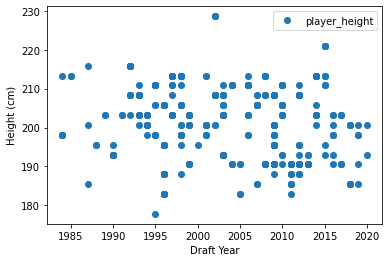

In [6]:
df['pts'] = df['pts'].astype('float')
df['draft_number'] = df['draft_number'].astype('int')
df.plot(x='draft_year', y='player_height', style='o')
plt.xlabel('Draft Year')
plt.ylabel('Height (cm)')

plt.show()

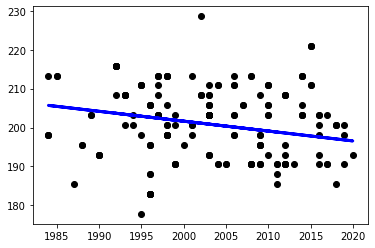

In [7]:
X= pd.DataFrame(df['draft_year'])
Y= pd.DataFrame(df['player_height'])
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# print(y_pred)
# print(y_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)